In [1]:
import numpy as np
import pandas as pd

In [2]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                 590      593      579      588      589      591      576  \
F1  Times1   10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times2   10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times3   10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times4   10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times5   10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
...              ...      ...      ...      ...      ...      ...      ...   
F23 Times16  10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times17  10099.0  10099.0  10199.0  10099.0  10099.0  10099.0  10199.0   
    Times18  10099.0  10099.0  10199.0  10099.

In [3]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./SSGA_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [1,2,3,5,6,7,11,12,13,14,15,16,17,18,19,20,21,22,23]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./SSGA_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                   590        593        579        588        589        591  \
F1  Times1   65.452792  77.176220  65.242866  45.188359  37.904985  47.859525   
    Times2   78.219570  64.580757  41.999949  49.913117  29.708938  47.642190   
    Times3   61.705430  84.727998  57.702995  41.971498  26.813663  41.816083   
    Times4   58.715259  68.301655  58.277611  36.898642  17.317747  41.263693   
    Times5   73.241766  63.294696  34.850075  71.487768  39.910058  44.898601   
...                ...        ...        ...        ...        ...        ...   
F23 Times16  -2.427197  -1.859438 -10.533926 -10.533711 -10.508211  -2.871102   
    Times17  -3.835291  -2.421545 -10.535665  -2.421621 -10.533412  -3.834993   
    Times18  -2.421

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F1,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F6,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F7,0%,10%,60%,60%,140%,50%,70%,0%,0%,170%,120%,0%,40%,0%,100%,200%,10%,50%,190%,190%
F11,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F12,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F13,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_1517/2336809088.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)


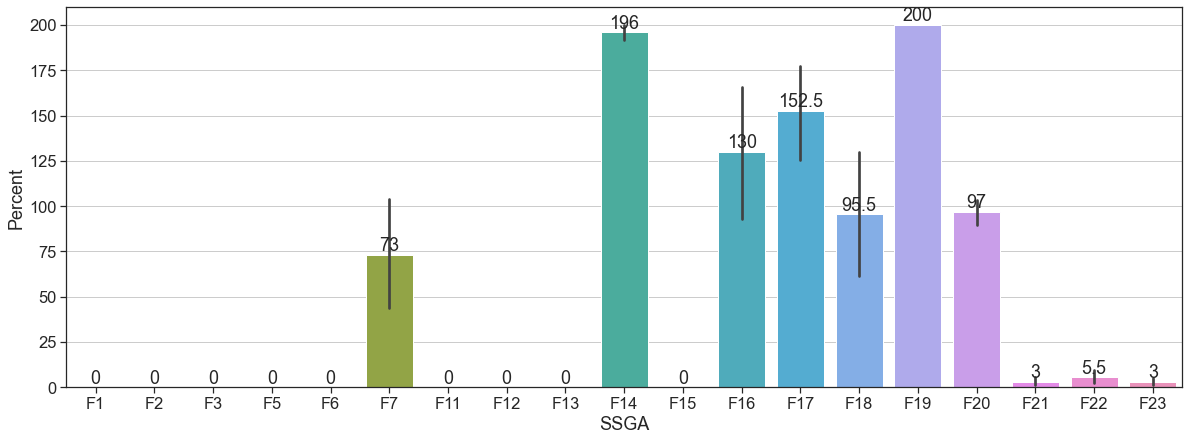

In [4]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("SSGA")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./SSGA_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [5]:
# from matplotlib import pyplot as plt
# dataframe = df.copy()
# dataframe = dataframe.stack()
# # display(dataframe)
# dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
# dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
# dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
# dataframe = dataframe.reset_index(drop=False)
# # display(dataframe)
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
# def show_graph(dataframe):
#     sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
#     dist_cols = 3
#     dist_rows = 8
#     plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
#     i = 1
#     for function in function_list:
#         dataf = dataframe[dataframe["Function"] == function]
#         plt.subplot(dist_rows, dist_cols, i)
#         ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
#         plt.axhline(y=opt[i-1],color="red")
#         plt.xlabel("")
#         plt.ylabel("Solutions")
#         i = i + 1
#     plt.savefig("./boxplot_SSGA.png", dpi=1200, bbox_inches='tight')
#     plt.show()
# show_graph(dataframe=dataframe)